In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
 
from keras.layers import LSTM,Dense
from keras.models import Sequential
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.callbacks import EarlyStopping
 
import warnings 
warnings.filterwarnings('ignore')
 
%matplotlib inline

In [ ]:
data = pd.read_csv("/content/drive/My Drive/ColabDataset/FilledTimeSeriesDomesticFlightFare.csv",index_col='InvoiceDate')

In [ ]:
data.head(10)

,NetFare,AvgNetFare
InvoiceDate,,
2018-01-04,146476,5231
2018-01-05,392004,6533
2018-01-06,621343,5861
2018-01-07,212856,3734
2018-01-08,1191582,4225
2018-01-09,1056218,4419
2018-01-10,1854520,4468
2018-01-11,1216242,5311
2018-01-12,1438677,5193


In [ ]:
data.tail(10)

,NetFare,AvgNetFare
InvoiceDate,,
2019-11-26,2565004,4392
2019-11-27,2565004,4392
2019-11-28,2565004,4392
2019-11-29,2565004,4392
2019-11-30,2565004,4392
2019-12-01,1350447,4273
2019-12-02,3433497,4742
2019-12-03,2336595,4645
2019-12-04,675411,6196


In [ ]:
701*0.9

630.9

In [ ]:
data =np.log(data)

In [ ]:
xTrain,xTest = data['AvgNetFare'][:600],data['AvgNetFare'][600:]

In [ ]:
xTest.shape

(101,)

In [ ]:
xTrain.shape

(600,)

In [ ]:
xTrain = np.array(xTrain).reshape(-1,1)
xTest = np.array(xTest).reshape(-1,1)

In [ ]:
xTest.shape

(101, 1)

In [ ]:
scaler = MinMaxScaler()

In [ ]:
xTrain = scaler.fit_transform(xTrain)
ScaledxTest = scaler.transform(xTest)

In [ ]:
lag = 30
feature =1

In [ ]:
TrainingGen = TimeseriesGenerator(xTrain,xTrain,length=lag,batch_size=feature)

In [ ]:
TestingGen = TimeseriesGenerator(ScaledxTest,ScaledxTest,length=lag,batch_size=feature)

**Just Creating the Training and Testing Model**



In [ ]:
model = Sequential()

model.add(LSTM(200,input_shape=(lag,feature),activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 200)               161600    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 201       
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________


In [ ]:
call = EarlyStopping(patience=5,monitor='val_loss',verbose=0)

In [ ]:
model.fit_generator(TrainingGen,epochs=50,callbacks=[call],validation_data=TestingGen)

Epoch 1/50
570/570 [==============================] - 17s 29ms/step - loss: 0.0141 - val_loss: 1.3964e-04
Epoch 2/50
570/570 [==============================] - 16s 28ms/step - loss: 0.0084 - val_loss: 3.8973e-04
Epoch 3/50
570/570 [==============================] - 16s 28ms/step - loss: 0.0082 - val_loss: 0.0011
Epoch 4/50
570/570 [==============================] - 16s 29ms/step - loss: 0.0080 - val_loss: 0.0063
Epoch 5/50
570/570 [==============================] - 16s 28ms/step - loss: 0.0074 - val_loss: 0.0057
Epoch 6/50
570/570 [==============================] - 16s 28ms/step - loss: 0.0070 - val_loss: 0.0077


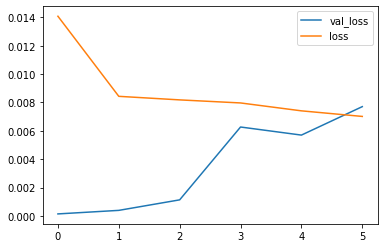

In [ ]:
loss = pd.DataFrame(model.history.history)

loss.plot()

In [ ]:
pred = []

predData = xTrain[-lag:]

current_batch = predData.reshape((1,lag,feature))

for x in range(len(xTest)):
  current_pred = model.predict(current_batch)[0]

  pred.append(current_pred)

  current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [ ]:
true_prediction = scaler.inverse_transform(pred)

In [ ]:
len(data.index[600:])

101

In [ ]:
len(xTest)

101

In [ ]:
newData = pd.DataFrame(index=data.index[600:])
newData['xTest'] = xTest
newData['Pred'] = true_prediction.flatten()

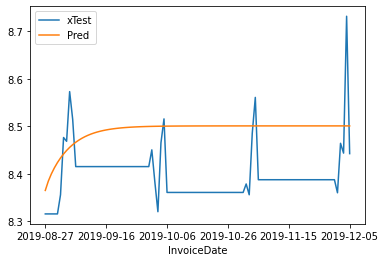

In [ ]:
newData.plot()

In [ ]:
newData

,xTest,Pred
InvoiceDate,,
2019-08-27,8.315566,8.364994
2019-08-28,8.315566,8.384650
2019-08-29,8.315566,8.399880
2019-08-30,8.315566,8.412690
2019-08-31,8.315566,8.423704
...,...,...
2019-12-01,8.360071,8.500846
2019-12-02,8.464214,8.500846
2019-12-03,8.443547,8.500846
